## Use Case - Pearson Korrelationskoeffizient

In [62]:
## imports
import pandas as pd
import seaborn as sns
import numpy as np

Dataset mpg importieren

In [3]:
mpg = pd.read_csv("../Datasets/mpg.csv")

Überblick über alle Features

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Korrelation zwischen weight und mpg (Korrelationsmatrix)

In [47]:
mpg[['weight','mpg']].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


In [48]:
# Korrelation zwischen allen Werten 
mpg.corr()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [53]:
mpg.cov()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
mpg,61.089611,-10.308911,-655.402318,-5505.211745,9.058930,16.741163,3.532185
cylinders,-10.308911,2.893415,168.623214,1290.695575,-2.370842,-2.193499,-0.767477
displacement,-655.402318,168.623214,10872.199152,82368.423240,-156.332976,-142.717137,-50.964989
weight,-5505.211745,1290.695575,82368.423240,717140.990526,-974.899011,-959.946344,-394.639330
acceleration,9.058930,-2.370842,-156.332976,-974.899011,7.604848,2.938105,0.455354
model_year,16.741163,-2.193499,-142.717137,-959.946344,2.938105,13.672443,0.535790
origin,3.532185,-0.767477,-50.964989,-394.639330,0.455354,0.535790,0.643292


In [59]:
mpg[['weight','mpg']].cov().reset_index().mpg[0]

-5505.211745123603

In [65]:
np.cov(mpg.weight,mpg.mpg)[0][1] #Index 0 welche Variable x, Index 1 welche Variable y --> [0][0] Vergleich mit sich selbst

-5505.211745123603

## Berechnung von Korrelationskoeffizient aus Kovarianz und Standardabweichung

In [ ]:
### cov(x,y)/(std x * std y)

In [60]:
corr_weight_mpg = (mpg[['weight','mpg']].cov().reset_index().mpg[0])/(mpg.weight.std()*mpg.mpg.std())

In [61]:
corr_weight_mpg

-0.8317409332443348

## Visualisierung zur Untersuchung von linearen Zusammenhängen

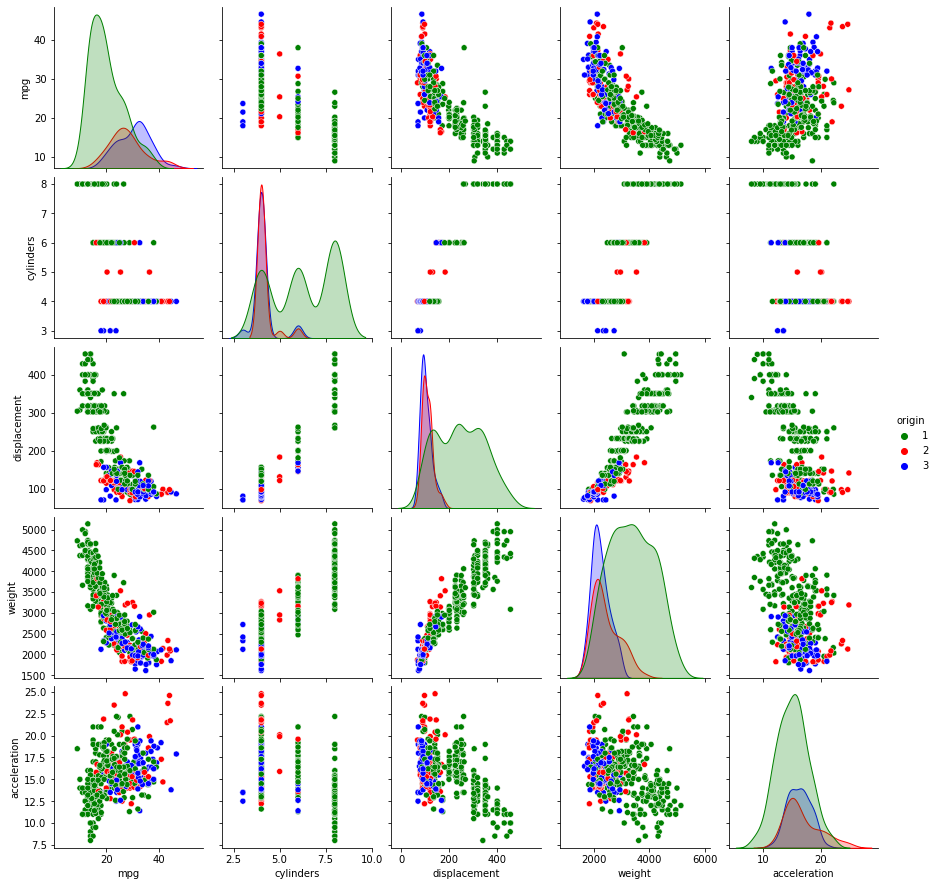

In [52]:
sns.pairplot(data=mpg[["mpg","cylinders","displacement","weight","acceleration","origin"]],hue="origin",palette={1:'green',2:'red',3:'blue'})